## 1.Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

## 2.Hypothesis Generation


By analysing the data set these are the few hypothesis that we can make,
1.Certain item types have higher sales compared to others.
2.Items with higher visibility have higher sales.
3.Supermarket-type outlets have higher sales than grocery stores.
4.Larger-sized outlets have higher sales compared to smaller-sized outlets.
5.Outlets established more recently have higher sales.
6.Items with higher weights have higher sales.
7.Items with low-fat content have higher sales compared to regular-fat items.


## Loading Necessary Packages and Data

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading Data

In [59]:
testdata=pd.read_csv(r'D:\Code playground\Mini Project\Test.csv')
traindata=pd.read_csv(r'D:\Code playground\Mini Project\Train.csv')

In [60]:
testdata

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [61]:
traindata

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Datastructure and Content 

In [62]:
traindata.shape

(8523, 12)

In [63]:
testdata.shape

(5681, 11)

In [64]:
type(traindata)

pandas.core.frame.DataFrame

In [65]:
type(testdata)

pandas.core.frame.DataFrame

In [66]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [67]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [68]:
traindata.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [69]:
testdata.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [70]:
traindata.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## 5.Exploratory Data Analysis  

In [71]:
traindata.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [72]:
# Item_Weight and Outlet_Size has null values

In [73]:
testdata.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [74]:
# Item_Weight and Outlet_Size has null values

In [75]:
traindata.Item_Fat_Content.nunique()

5

In [76]:
traindata['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [77]:
# It seems that the column contains variations in labeling "Low Fat" items, including using abbreviations like "LF" and "low fat." 
#Similarly, "Regular" items are represented as "reg."
#These need to be fixed in Data preprocessing step

In [78]:
traindata['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [79]:
traindata['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [80]:
traindata['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [81]:
# There are 10 outlets in total

In [82]:
traindata['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [83]:
# There are three sizes- Medium,Small,High

In [84]:
traindata['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [85]:
# There are three types- Tier 1,Tier 2,Tier 3. 

In [86]:
traindata['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [87]:
# There are three outlet types- Supermarket Type1, Supermarket Type2, Supermarket Type 3, Grocery Store

#### Descriptive statistics of each numerical columns

In [88]:
traindata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Descriptive statistics of each categorical columns

In [89]:
traindata[['Item_Identifier','Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']].describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


## 6. Univariate Analysis

#### Distribution of numerical columns

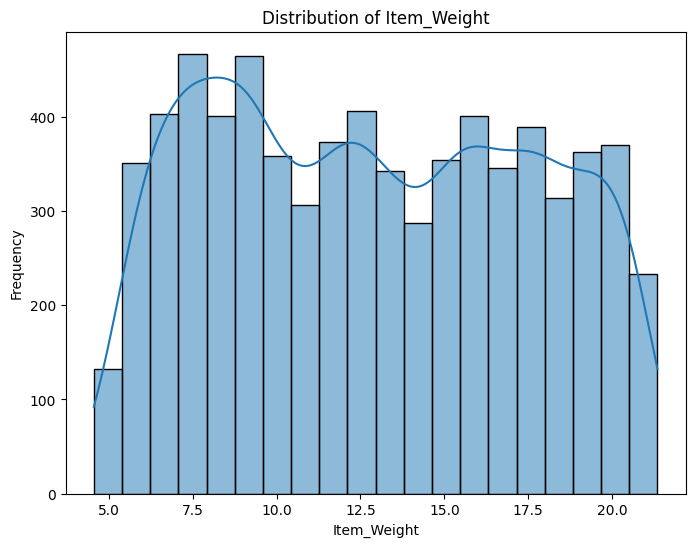

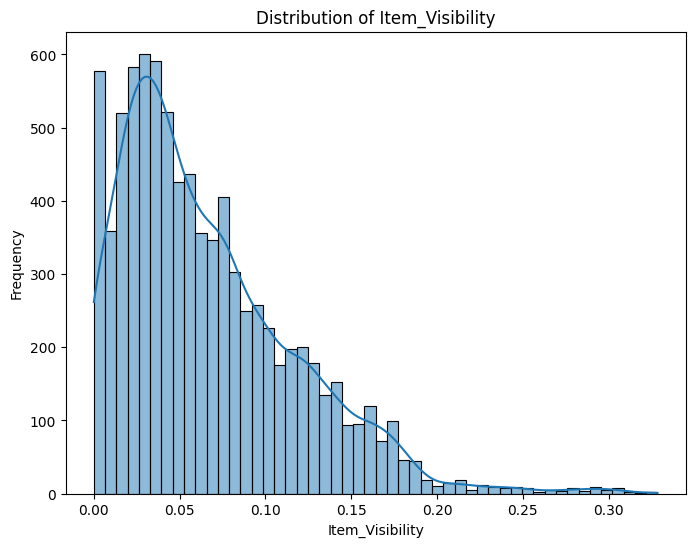

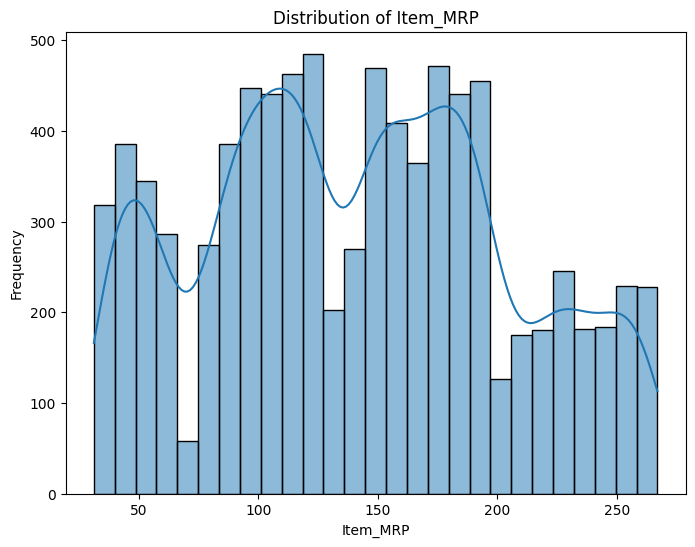

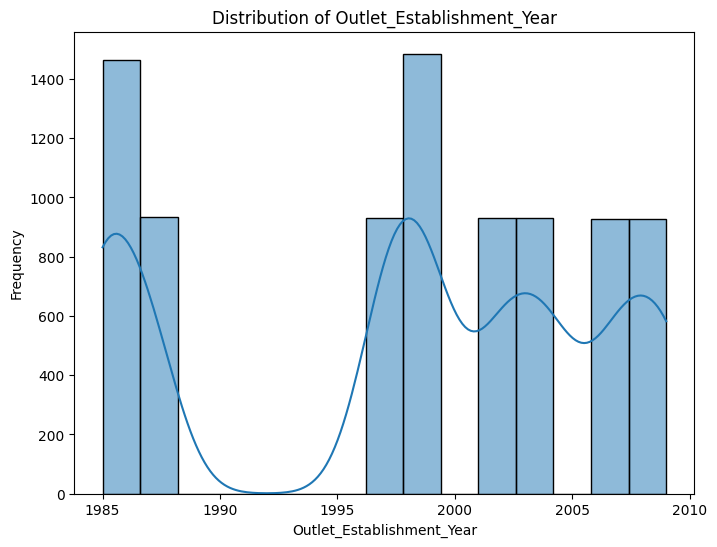

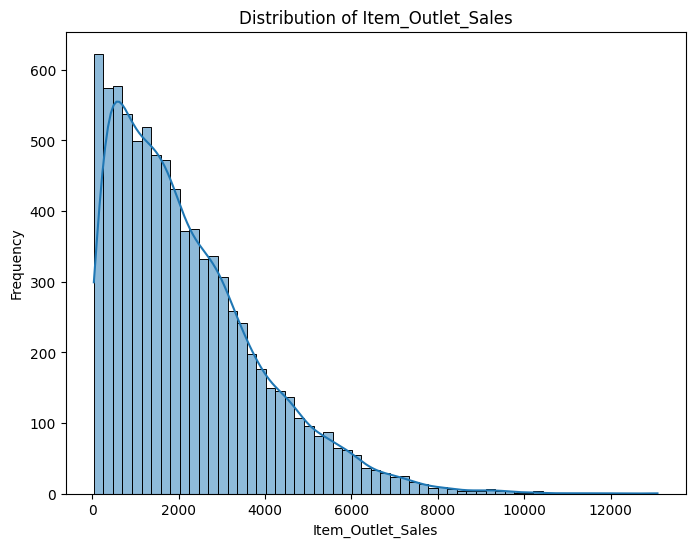

In [90]:
## Plot the distribution of numerical columns to decide if to take mean or median for filling the missing values
numerical_columns=traindata.select_dtypes(include=['float','int'])
# Plot histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=traindata, x=column, kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

##### INFERENCE
The graphs are skewed. The Item_Weight is cosidered normal distribution.Null values can be filled with mean 

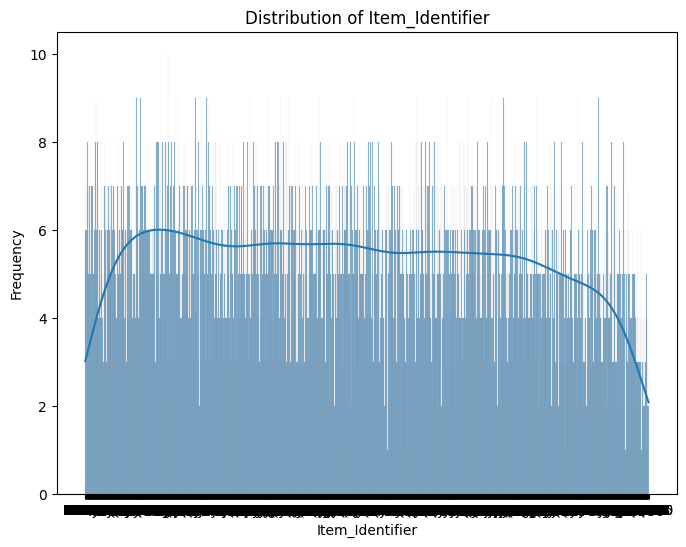

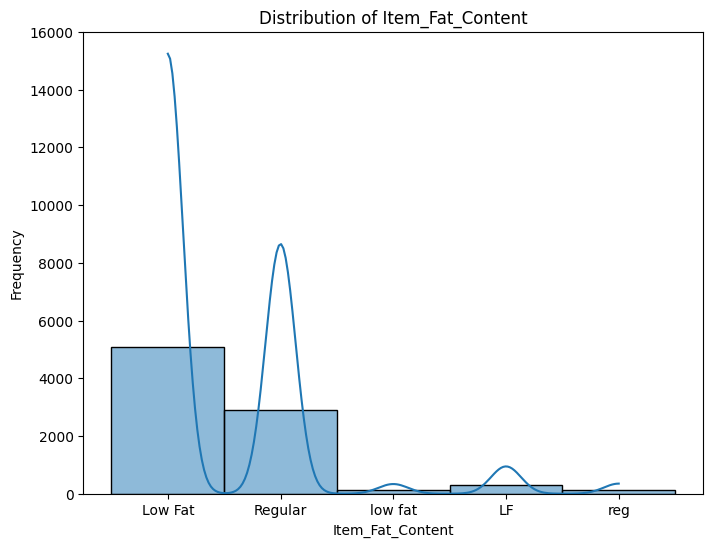

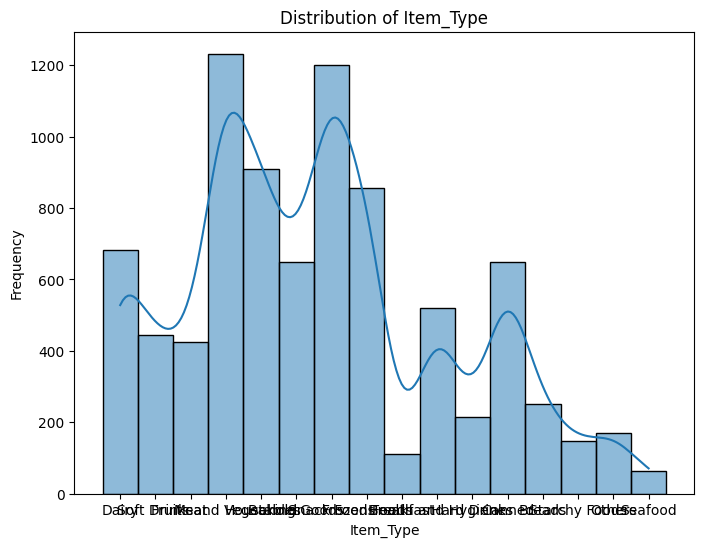

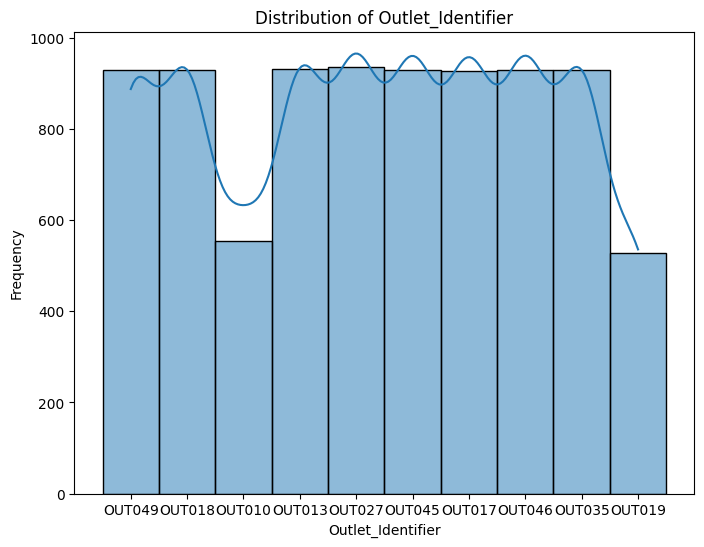

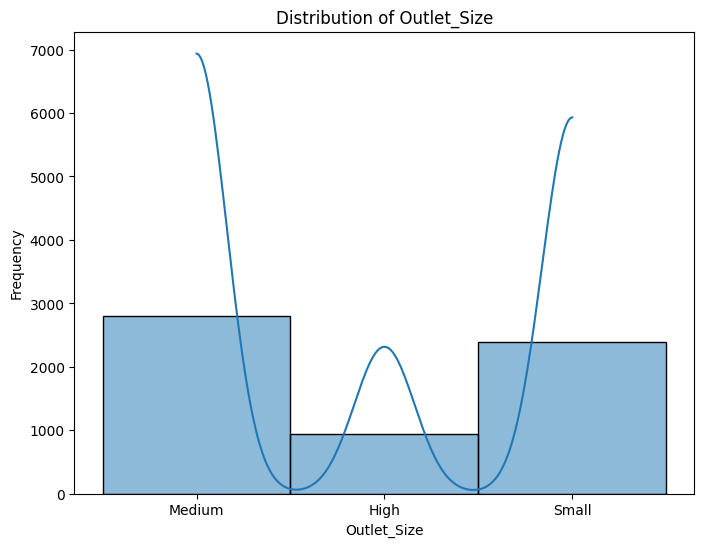

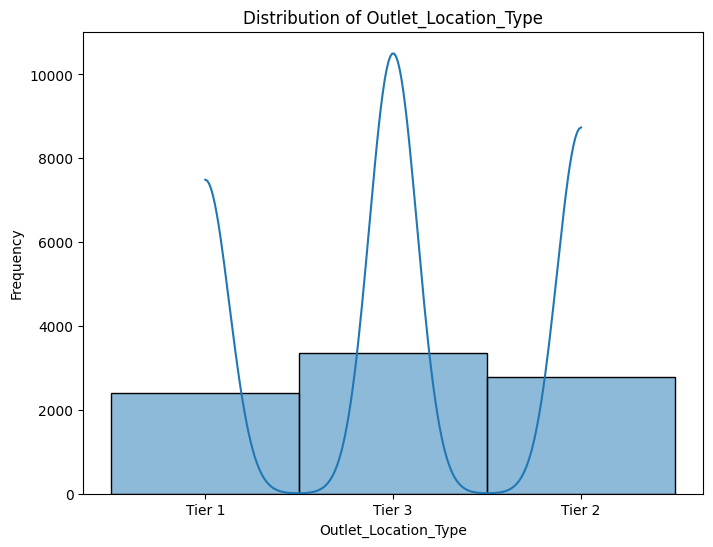

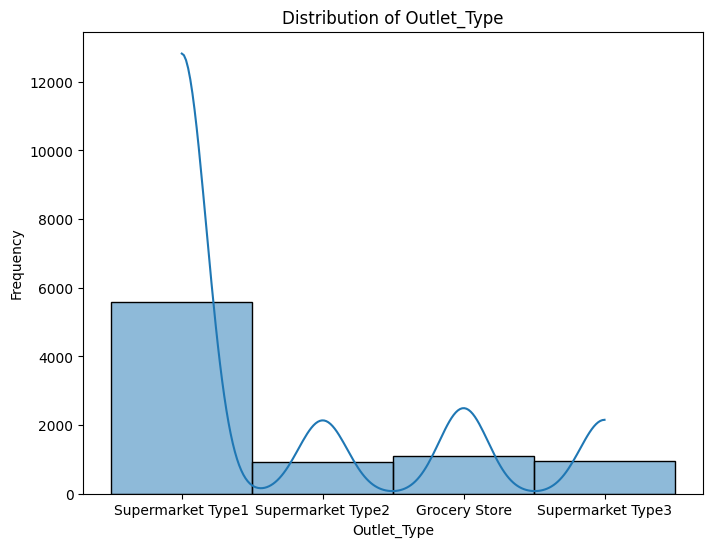

In [91]:
## Plot the distribution of categorical columns 
categorical_columns=traindata.select_dtypes(include=['object'])
# Plot histograms for each numerical column
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=traindata, x=column, kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

##### INFERENCE
Since Outlet_Size is a categorical value and skewed distribution we can use mode to fill the missing values

## 6.Univariate  Analysis

### Item_Weight

array([[<Axes: title={'center': 'Item_Weight'}>]], dtype=object)

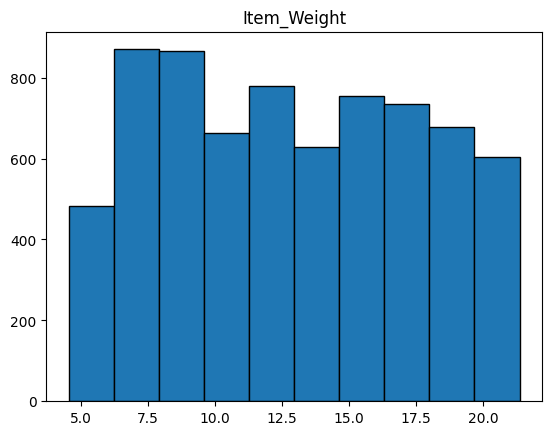

In [92]:
traindata.hist(column='Item_Weight', grid=False, edgecolor='black')

In [93]:
traindata['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

#### INFERENCE
The mean weight is 12.85
The maximum weight is 21.35 and minimun weight is 4.55

### Item_Visibility

array([[<Axes: title={'center': 'Item_Visibility'}>]], dtype=object)

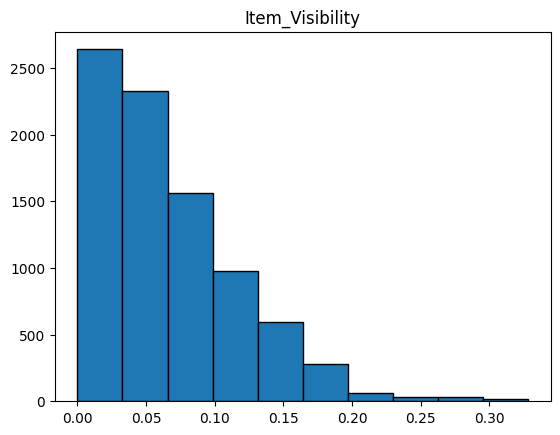

In [94]:
traindata.hist(column='Item_Visibility', grid=False, edgecolor='black')

In [95]:
traindata['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

#### INFERENCE
Min value is 0: A value of 0 in the "Item_Visibility" column would indicate that the item is not visible on the store shelves at all. 
Max value is 0.32: A value of 0.32 in the "Item_Visibility" column suggests that the item is visible on the store shelves, and its visibility accounts for 32% of the available shelf space 
Items with higher visibility are more likely to attract customers' attention, leading to increased sales. Conversely, items with low or zero visibility may remain unsold or have slower sales.


### Item_MRP

array([[<Axes: title={'center': 'Item_MRP'}>]], dtype=object)

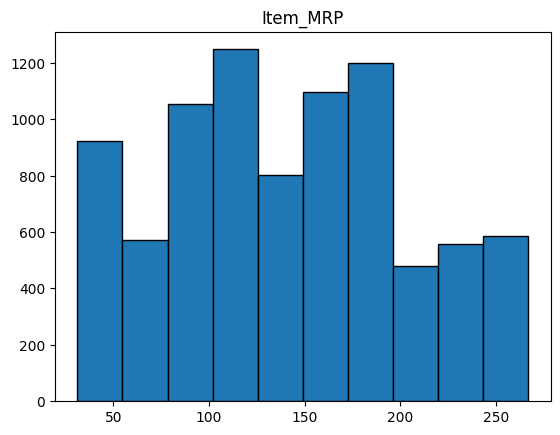

In [96]:
traindata.hist(column='Item_MRP', grid=False, edgecolor='black')

In [97]:
traindata['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

#### INFERENCE
The minimum MRP is 31.29 and the maximum MRP is 266.88

### Outlet_Establishment_Year 

array([[<Axes: title={'center': 'Outlet_Establishment_Year'}>]],
      dtype=object)

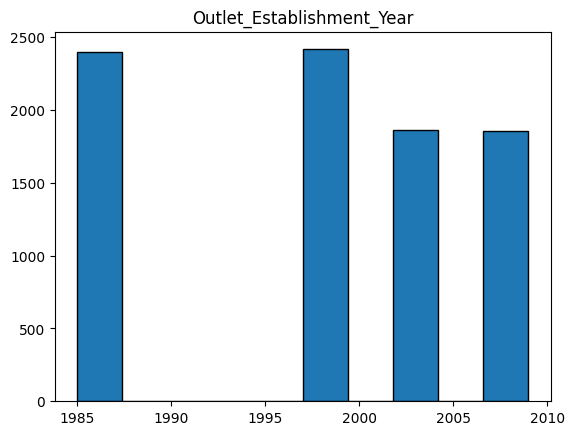

In [98]:
traindata.hist(column='Outlet_Establishment_Year',grid=False,edgecolor='black')

In [99]:
traindata['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

#### INFERENCE
The first shop was established in the year 1985 and the last outlet in 2009

### Item_Outlet_Sales

array([[<Axes: title={'center': 'Item_Outlet_Sales'}>]], dtype=object)

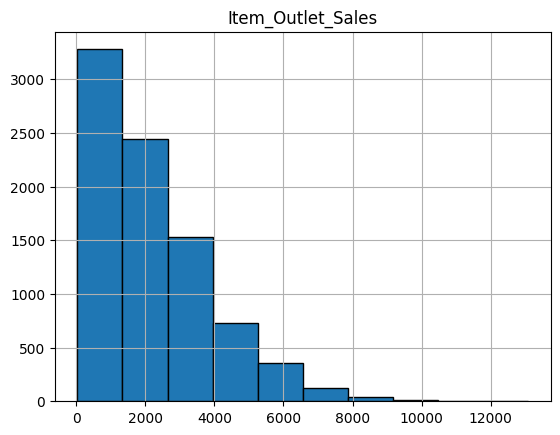

In [100]:
traindata.hist(column='Item_Outlet_Sales',grid='True',edgecolor='black')

In [101]:
traindata['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

#### INFERENCE
Minimum sale is Rs.33.29 and Maximum Sale is Rs.13086.96

### Item_Fat_Content 

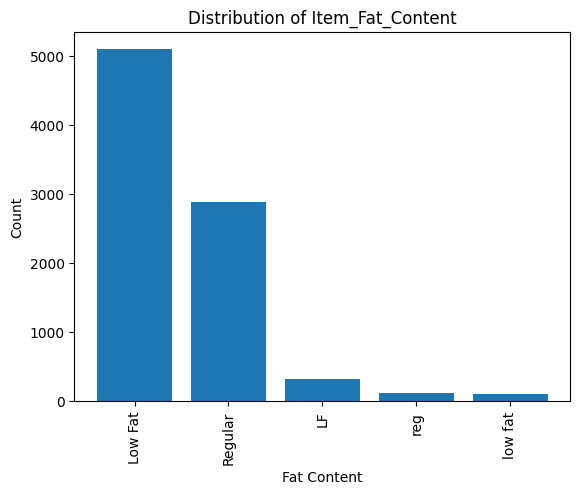

In [102]:
fat_count=traindata['Item_Fat_Content'].value_counts()
top=fat_count.head(10)
plt.bar(top.index,top.values)
plt.xticks(rotation=90)
plt.xlabel('Fat Content')
plt.ylabel('Count')
plt.title('Distribution of Item_Fat_Content')
plt.show()

#### INFERENCE
Low fat is the top selling Item

### Item_Identifier

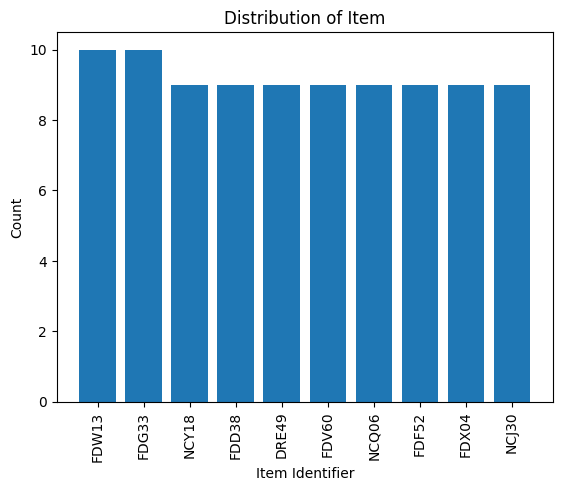

In [103]:
type_count=traindata['Item_Identifier'].value_counts()
top=type_count.head(10)
plt.bar(top.index,top.values)
plt.xticks(rotation=90)
plt.xlabel('Item Identifier')
plt.ylabel('Count')
plt.title('Distribution of Item')
plt.show()

### Item_Type 

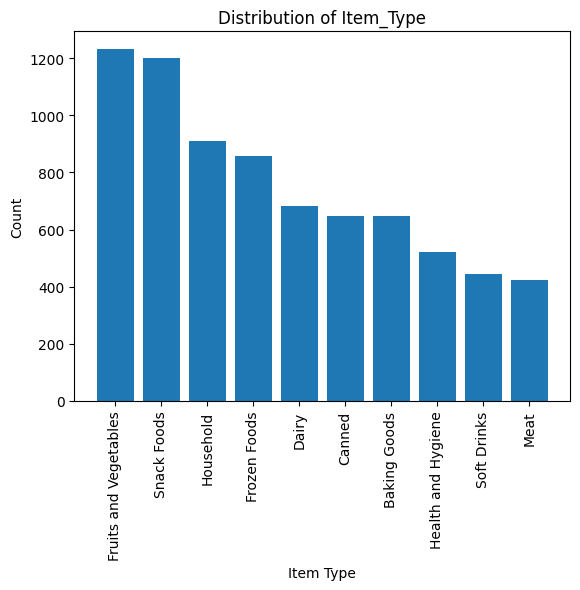

In [104]:
type_count=traindata['Item_Type'].value_counts()
top=type_count.head(10)
plt.bar(top.index,top.values)
plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.title('Distribution of Item_Type')
plt.show()

#### INFERENCE
Fruits and Vegetables are the highest selling item. Snacks Foods is second.Least selling item is meat

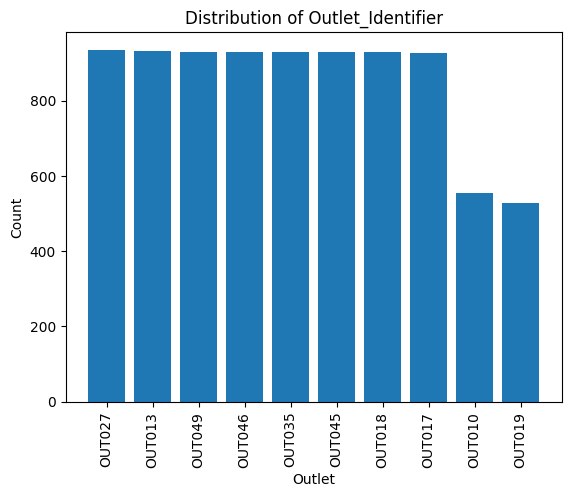

In [105]:
Outlet_count=traindata['Outlet_Identifier'].value_counts()
top=Outlet_count.head(10)
plt.bar(top.index,top.values)
plt.xticks(rotation=90)
plt.xlabel('Outlet')
plt.ylabel('Count')
plt.title('Distribution of Outlet_Identifier')
plt.show()

#### INFERENCE
Outlets have same appearance in the data. 

### Outlet_Size 

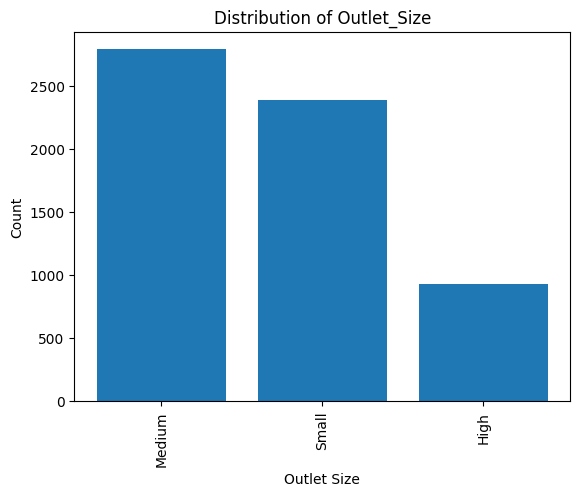

In [106]:
size_count=traindata['Outlet_Size'].value_counts()
top=size_count.head(10)
plt.bar(top.index,top.values)
plt.xticks(rotation=90)
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Distribution of Outlet_Size')
plt.show()

#### INFERENCE
Medium sized outlets are more followed by small and high

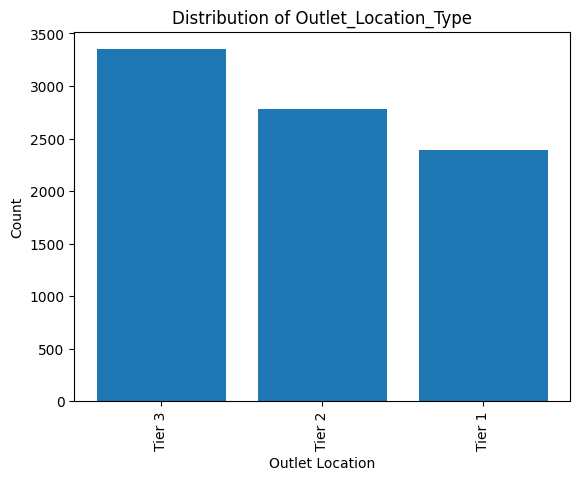

In [107]:
location_count=traindata['Outlet_Location_Type'].value_counts()
top=location_count.head(10)
plt.bar(top.index,top.values)
plt.xticks(rotation=90)
plt.xlabel('Outlet Location')
plt.ylabel('Count')
plt.title('Distribution of Outlet_Location_Type')
plt.show()

#### INFERENCE
Most of the outlets are located in Tier3, then Tier 2 and finally Tier1

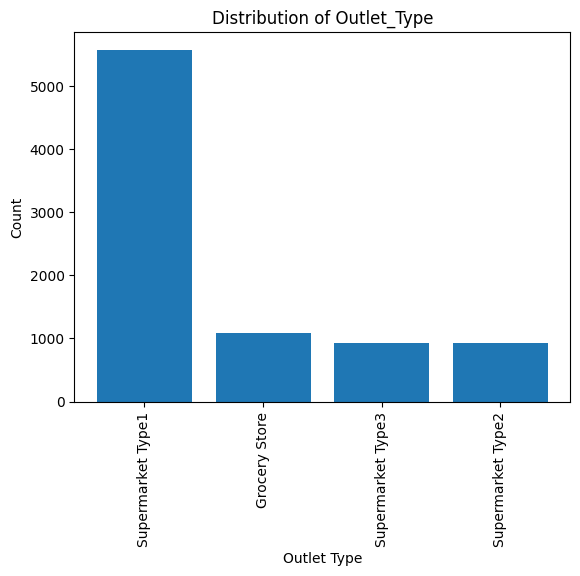

In [108]:
Outlettype_count=traindata['Outlet_Type'].value_counts()
top=Outlettype_count.head(10)
plt.bar(top.index,top.values)
plt.xticks(rotation=90)
plt.xlabel('Outlet Type')
plt.ylabel('Count')
plt.title('Distribution of Outlet_Type')
plt.show()

#### INFERENCE
Supermarket Type1 is more compared to others

## 7.Bivariate analysis

### Item_MRP Vs Item_Outlet_Sales 

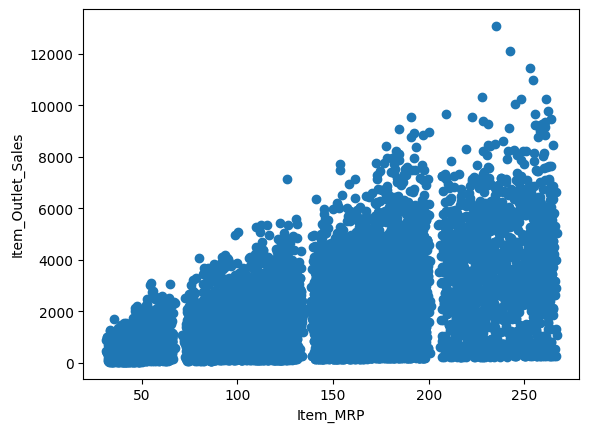

In [109]:
plt.scatter(traindata['Item_MRP'], traindata['Item_Outlet_Sales'])
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

#### INFERENCE
More sale is for items with more MRP.So these two columns has relation

### Item_Visibility Vs Item_Outlet_Sales

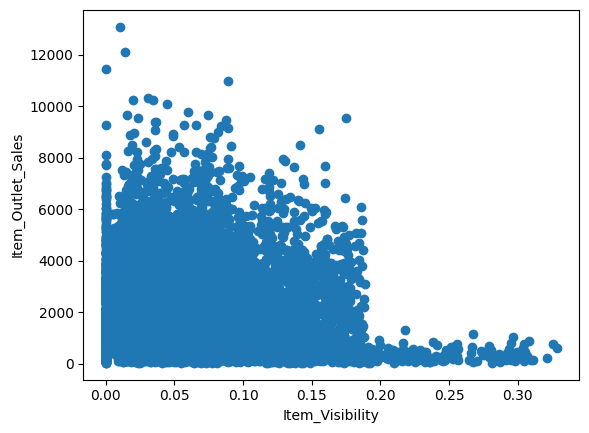

In [110]:
plt.scatter(traindata['Item_Visibility'], traindata['Item_Outlet_Sales'])
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

#### INFERENCE
Items with higher visibility might be priced more, making customers buy those items.
Price-sensitive customers may choose these items over higher-priced items with better visibility.
That may be the reason for high sale for items with less visibility.

### Outlet_Establishment_Year Vs Item_Outlet_Sales 

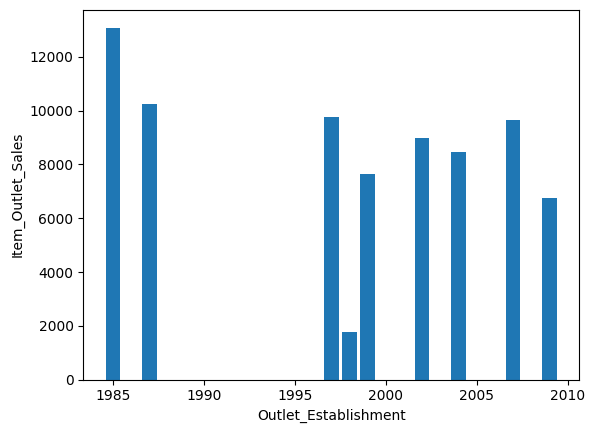

In [111]:
plt.bar(traindata['Outlet_Establishment_Year'], traindata['Item_Outlet_Sales'])
plt.xlabel('Outlet_Establishment')
plt.ylabel('Item_Outlet_Sales')
plt.show()

#### INFERENCE
The older outlet has more sale.
The first outlet, being the earliest to open, may have had more time to build and establish a loyal customer base. 

### Item_Weight Vs Item_Outlet_Sales

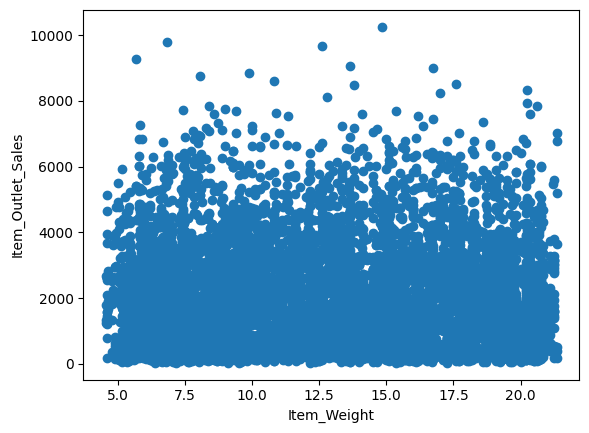

In [112]:
plt.scatter(traindata['Item_Weight'], traindata['Item_Outlet_Sales'])
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

### Item_Fat_Content Vs Item_Outlet_Sales

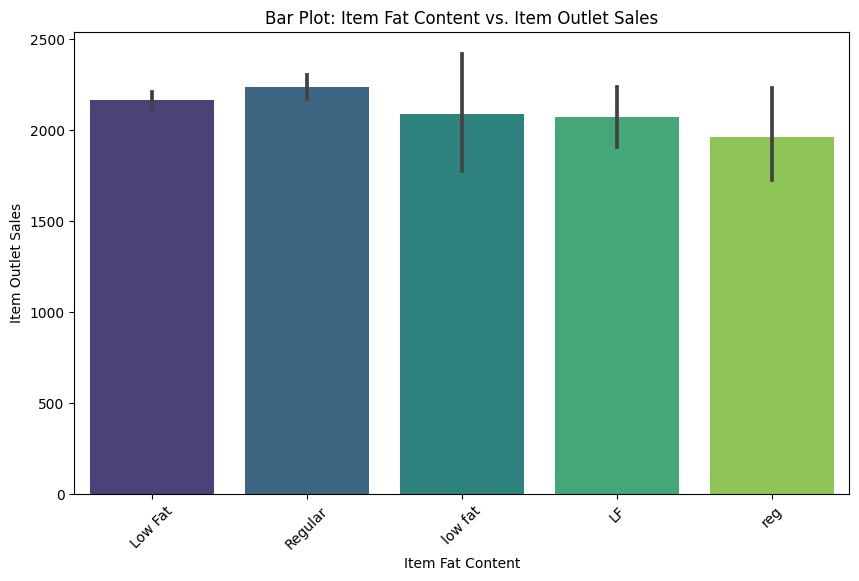

In [113]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=traindata, palette='viridis')

# Set labels and title
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.title('Bar Plot: Item Fat Content vs. Item Outlet Sales')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

#### INFERENCE
Actually Low fat has higher sales . Here LF and low fat are same as Low Fat

### Item_Type Vs Item_Outlet_Sales 

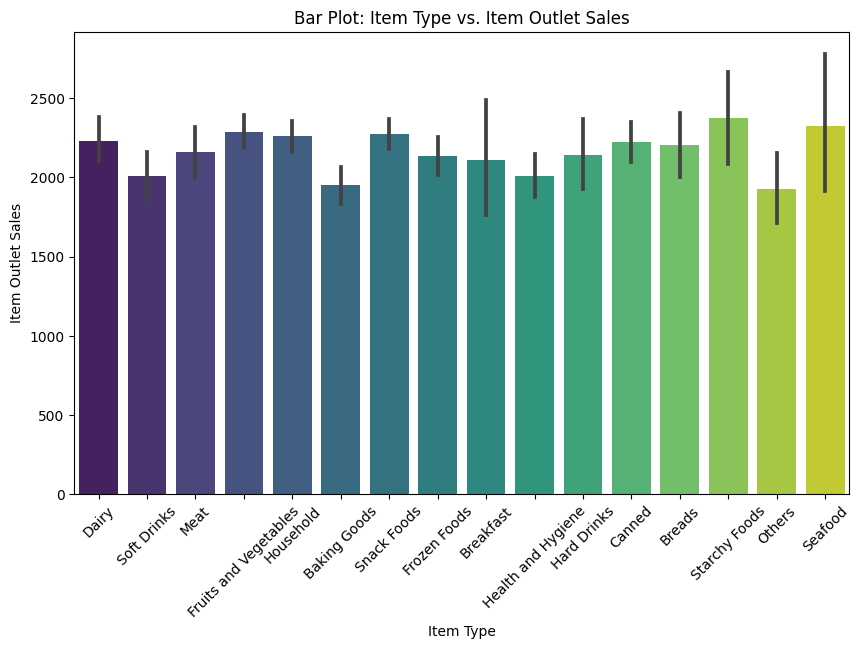

In [114]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=traindata, palette='viridis')

# Set labels and title
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.title('Bar Plot: Item Type vs. Item Outlet Sales')

plt.xticks(rotation=45)  

plt.show()

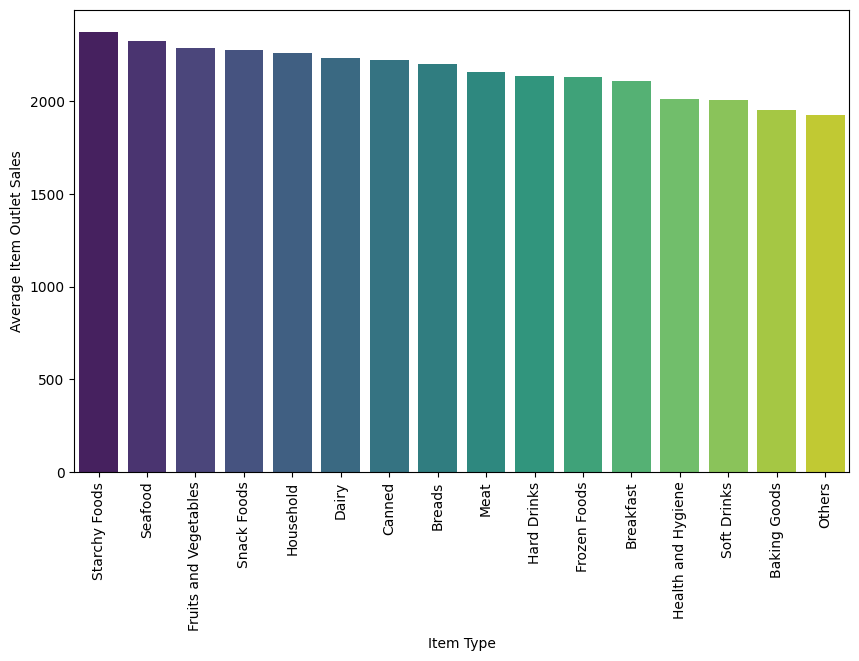

In [115]:
avg_sales_type = traindata.groupby('Item_Type')['Item_Outlet_Sales'].mean().reset_index()

# Sort the categories in descending order of average sales
avg_sales_type = avg_sales_type.sort_values(by='Item_Outlet_Sales', ascending=False)

# Create a bar plot with the sorted order
plt.figure(figsize=(10, 6))
sns.barplot( x='Item_Type',y='Item_Outlet_Sales',  data=avg_sales_type, palette='viridis')

# Set labels and title
plt.ylabel('Average Item Outlet Sales')
plt.xlabel('Item Type')
plt.xticks(rotation=90) 

plt.show()

#### INFERENCE
Starchy Food has higher sales. From the graph it is evident that all items sales is more than 2000

### Outlet Identifier Vs Item_Outlet_Sales 


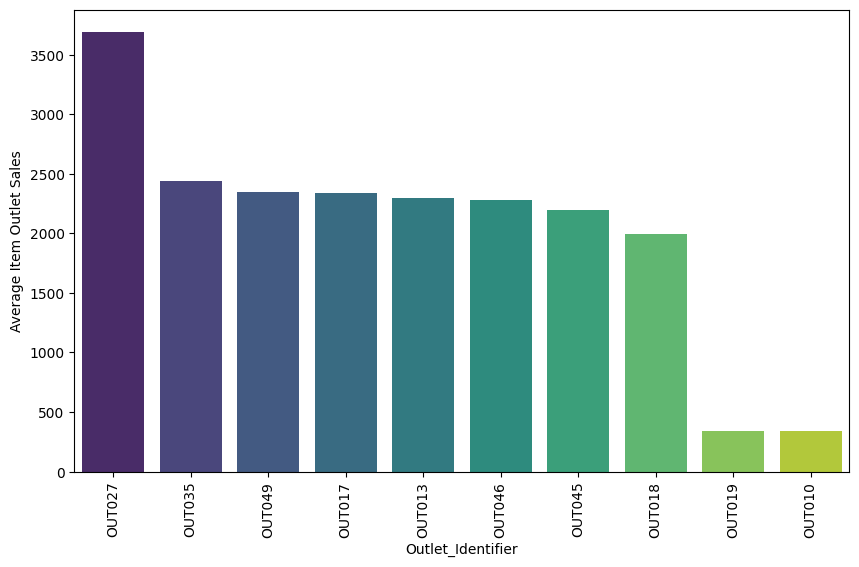

In [116]:
avg_sales = traindata.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().reset_index()

# Sort the categories in descending order of average sales
avg_sales = avg_sales.sort_values(by='Item_Outlet_Sales', ascending=False)

# Create a bar plot with the sorted order
plt.figure(figsize=(10, 6))
sns.barplot( x='Outlet_Identifier',y='Item_Outlet_Sales', data=avg_sales, palette='viridis')

# Set labels and title
plt.ylabel('Average Item Outlet Sales')
plt.xlabel('Outlet_Identifier')
plt.xticks(rotation=90) 

plt.show()

#### INFERENCE
Outlet OUT027 has higher sale

### Outlet_Size Vs Item_Outlet_Sales

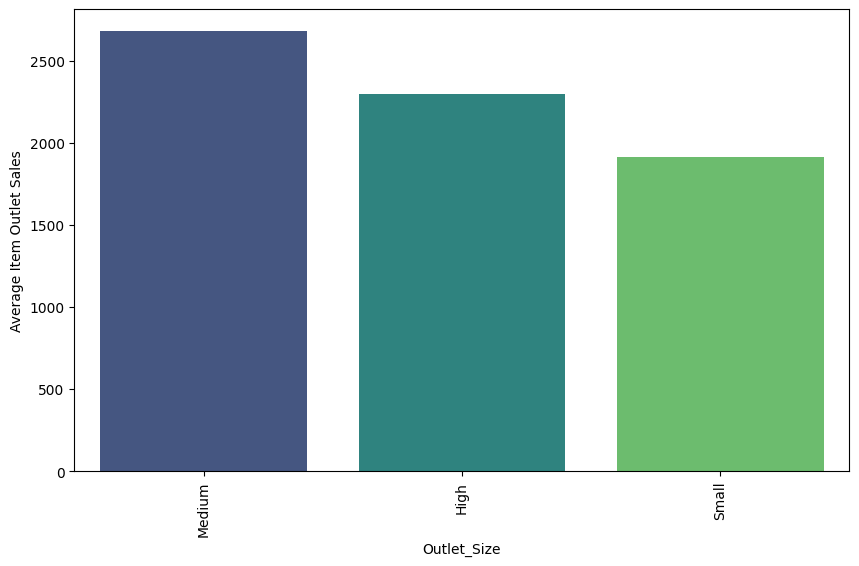

In [117]:
avg_size_sales = traindata.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().reset_index()

# Sort the categories in descending order of average sales
avg_size_sales = avg_size_sales.sort_values(by='Item_Outlet_Sales', ascending=False)

# Create a bar plot with the sorted order
plt.figure(figsize=(10, 6))
sns.barplot( x='Outlet_Size',y='Item_Outlet_Sales', data=avg_size_sales, palette='viridis')

# Set labels and title
plt.ylabel('Average Item Outlet Sales')
plt.xlabel('Outlet_Size')
plt.xticks(rotation=90) 

plt.show()

#### INFERENCE
Medium Outlets has high sale

### Outlet_location_Type Vs Item_Outlet_Sales 

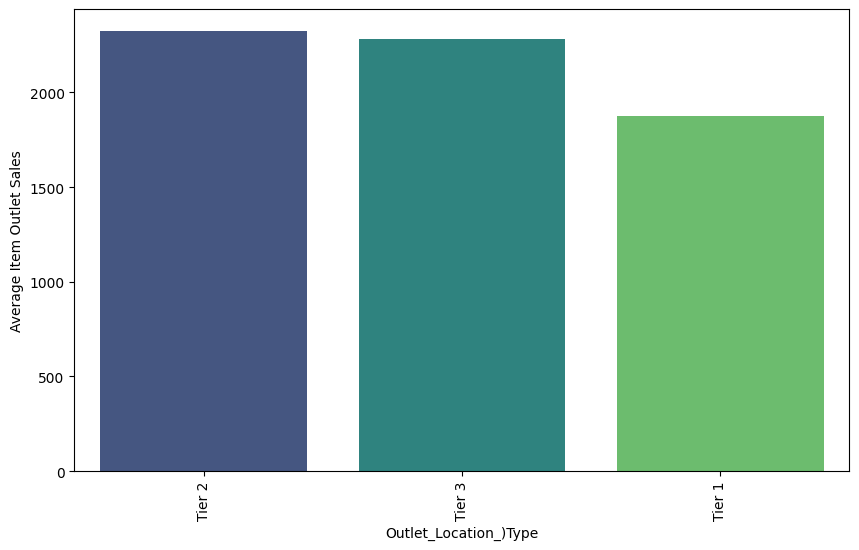

In [118]:
avg_loc_sales = traindata.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().reset_index()

# Sort the categories in descending order of average sales
avg_loc_sales = avg_loc_sales.sort_values(by='Item_Outlet_Sales', ascending=False)

# Create a bar plot with the sorted order
plt.figure(figsize=(10, 6))
sns.barplot( x='Outlet_Location_Type',y='Item_Outlet_Sales', data=avg_loc_sales, palette='viridis')

# Set labels and title
plt.ylabel('Average Item Outlet Sales')
plt.xlabel('Outlet_Location_)Type')
plt.xticks(rotation=90) 

plt.show()

#### INFERENCE
Tier2 has more sales

### Item_Identifier Vs Outlet_Outlet_Sales

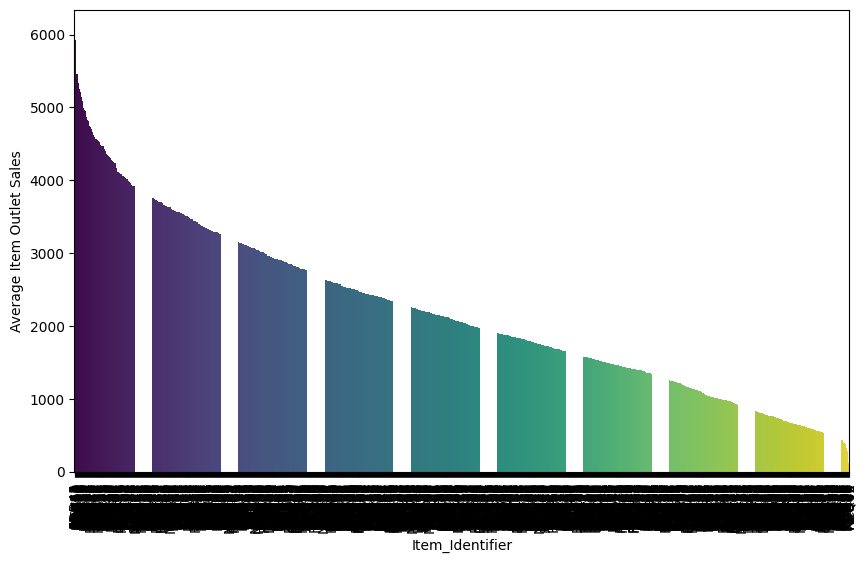

In [119]:
avg_id_sales = traindata.groupby('Item_Identifier')['Item_Outlet_Sales'].mean().reset_index()

# Sort the categories in descending order of average sales
avg_id_sales = avg_id_sales.sort_values(by='Item_Outlet_Sales', ascending=False)

# Create a bar plot with the sorted order
plt.figure(figsize=(10, 6))
sns.barplot( x='Item_Identifier',y='Item_Outlet_Sales', data=avg_id_sales, palette='viridis')

# Set labels and title
plt.ylabel('Average Item Outlet Sales')
plt.xlabel('Item_Identifier')
plt.xticks(rotation=90) 

plt.show()

In [120]:
corr=traindata.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

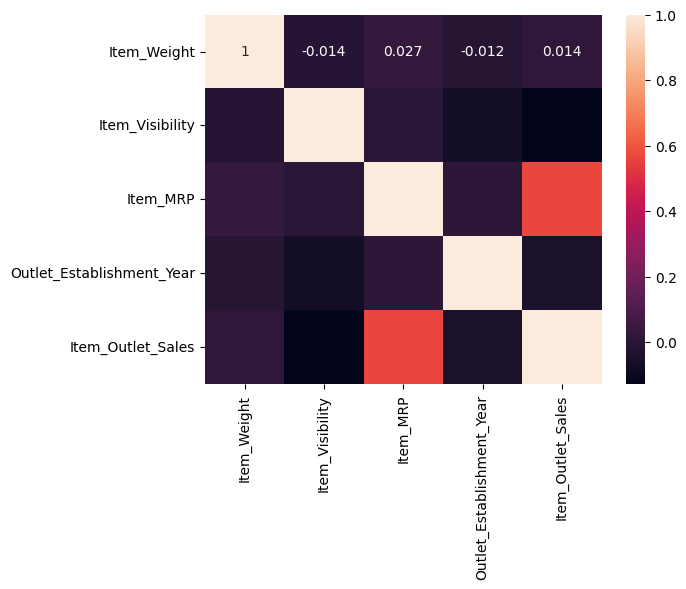

In [121]:
sns.heatmap(corr,annot=True)

## 8.Data Preprocessing

### 8.1 Data Cleaning

#### Handling Duplicates in Train Data

In [122]:
duplicate_rows = traindata[traindata.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


#### Handling Duplicates in Test Data

In [123]:
duplicate_rows = testdata[traindata.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type]
Index: []


#### Handling Missing Values in Train data

In [124]:
# Item_Weight and Outlet_Size has missing values in training dataset. 
# Handle missing values in 'Item_Weight' by filling with the mean
traindata['Item_Weight'].fillna(traindata['Item_Weight'].mean(), inplace=True)
# Handle missing values in 'Outlet_Size' by filling with the mode
traindata['Outlet_Size'].fillna(traindata['Outlet_Size'].mode()[0], inplace=True)

In [125]:
traindata.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Handling Missing Values in Test data

In [126]:
# Item_Weight and Outlet_Size has missing values in test dataset. 
# Handle missing values in 'Item_Weight' by filling with the mean
testdata['Item_Weight'].fillna(testdata['Item_Weight'].mean(), inplace=True)
# Handle missing values in 'Outlet_Size' by filling with the mode
testdata['Outlet_Size'].fillna(testdata['Outlet_Size'].mode()[0], inplace=True)

In [127]:
testdata.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#### Handling Item_Fat_Content Column in Test and Train Data

In [128]:
traindata['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)
testdata['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)

In [129]:
traindata['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [130]:
testdata['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

### 8.2 Feature Engineering

### 8.3 Encoding Categorical Variables

#### Label Encoding

In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = ['Item_Identifier','Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in categorical_columns:
   
    le.fit(pd.concat([traindata[col], testdata[col]]))
    traindata[col] = le.transform(traindata[col])
    testdata[col] = le.transform(testdata[col])


traindata 
 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [132]:
testdata

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1114,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1078,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1420,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,817,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1197,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,233,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1
5677,308,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2
5678,1426,10.000000,0,0.073529,8,118.7440,7,2002,1,1,1
5679,521,15.300000,1,0.000000,3,214.6218,2,2007,1,1,1


## 9.Modeling 

### 9.1 Feature Selection

<Axes: >

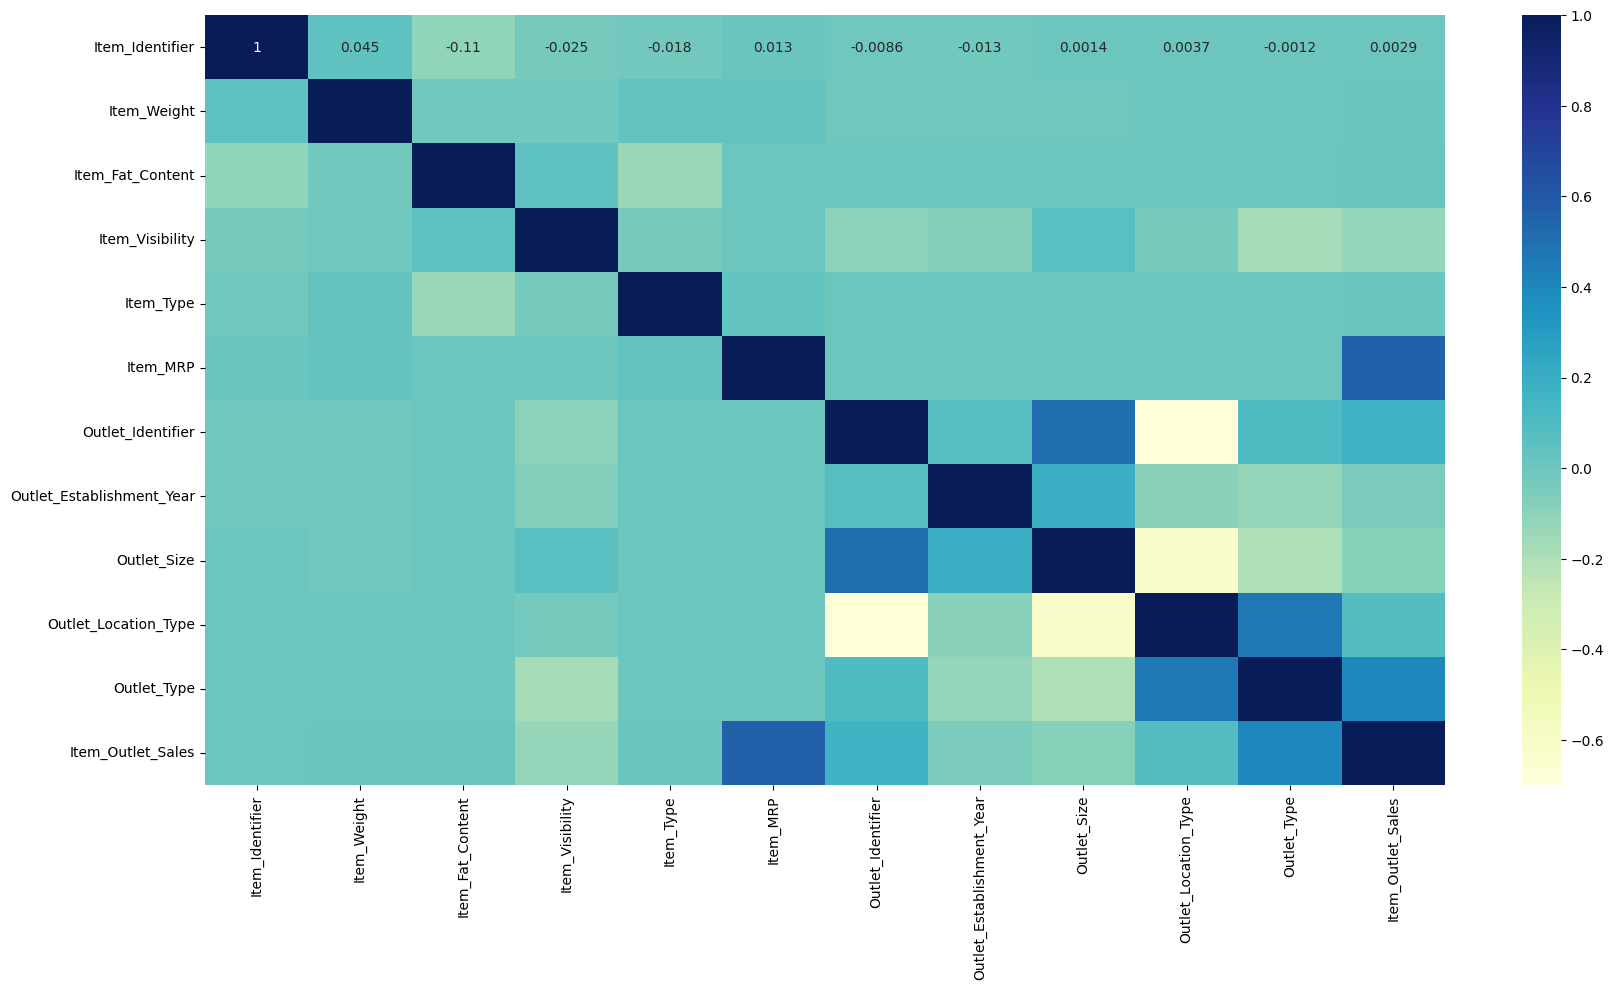

In [133]:
corrmatrix=traindata.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,annot=True,vmax=1,vmin=-0.7,cmap='YlGnBu')

In [134]:
#From the heat map select Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Identifier as features.
#Drop unnecessary columns
columns_to_drop = ['Item_Identifier', 'Item_Fat_Content','Item_Weight','Item_Visibility','Item_Fat_Content']
traindata.drop(columns=columns_to_drop, inplace=True)

In [135]:
traindata

,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,4,249.8092,9,1999,1,0,1,3735.1380
1,14,48.2692,3,2009,1,2,2,443.4228
2,10,141.6180,9,1999,1,0,1,2097.2700
3,6,182.0950,0,1998,1,2,0,732.3800
4,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...
8518,13,214.5218,1,1987,0,2,1,2778.3834
8519,0,108.1570,7,2002,1,1,1,549.2850
8520,8,85.1224,6,2004,2,1,1,1193.1136
8521,13,103.1332,3,2009,1,2,2,1845.5976


### 9.2Splitting Trainind data into Features and Targets

In [136]:
# Features (independent variables)
X_train = traindata.drop(columns=['Item_Outlet_Sales'])

# Target variable (dependent variable)
y_train = traindata['Item_Outlet_Sales']

X_test=testdata

In [137]:
X_train

,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,4,249.8092,9,1999,1,0,1
1,14,48.2692,3,2009,1,2,2
2,10,141.6180,9,1999,1,0,1
3,6,182.0950,0,1998,1,2,0
4,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...
8518,13,214.5218,1,1987,0,2,1
8519,0,108.1570,7,2002,1,1,1
8520,8,85.1224,6,2004,2,1,1
8521,13,103.1332,3,2009,1,2,2


In [138]:
y_train

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [139]:
X_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1114,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1078,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1420,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,817,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1197,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,233,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1
5677,308,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2
5678,1426,10.000000,0,0.073529,8,118.7440,7,2002,1,1,1
5679,521,15.300000,1,0.000000,3,214.6218,2,2007,1,1,1


## 10.Linear Regression

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [141]:
LR_model = LinearRegression()
# Train the Linear Regression model on the training data
LR_model.fit(X_train, y_train)
X_test_aligned = X_test[X_train.columns]
# Make predictions using the trained model
y_pred = LR_model.predict(X_test_aligned)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
val_predictions = LR_model.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)
print(f"Validation MSE: {val_mse}")
print('R Square Value=',r2_score(y_val, val_predictions))


Validation MSE: 1287439.8549327962
R Square Value= 0.5263230192467215


In [142]:
print(y_pred)

[2060.37344448 1094.6688544  2235.30776254 ... 1886.94865702 3080.42530212
 1285.65230282]


## 11.Regularized Linear Regression

In [143]:
from sklearn.linear_model import Ridge  
from sklearn.metrics import mean_squared_error, r2_score

ridge_model = Ridge(alpha=1.0)  
# Train the Ridge regression model on the training data
ridge_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = ridge_model.predict(X_test_aligned)

# Split  training data into features (X_val) and the target variable (y_val)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Make predictions on the validation data
val_predictions = ridge_model.predict(X_val)


val_mse = mean_squared_error(y_val, val_predictions)
print(f"Validation MSE: {val_mse}")


r2 = r2_score(y_val, val_predictions)
print(f"R-squared (R2) for Validation Data: {r2}")

Validation MSE: 1525428.4188408244
R-squared (R2) for Validation Data: 0.49129872513462514


In [144]:
print(y_pred)

[2084.01849905 1078.43984977 2253.50989716 ... 1905.41546444 3066.32102807
 1298.43198046]


## 12.Random Forest Regressor

In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators (trees)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test_aligned)

# Split training data into features (X_val) and the target variable (y_val)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Make predictions on the validation data
val_predictions = rf_model.predict(X_val)


val_mse = mean_squared_error(y_val, val_predictions)
print(f"Validation MSE: {val_mse}")


r2 = r2_score(y_val, val_predictions)
print(f"R-squared (R2) for Validation Data: {r2}")

Validation MSE: 193480.25233658648
R-squared (R2) for Validation Data: 0.9317285540188109


## 13.XGBoost Regressor

In [146]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = XGBRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Train the XGBoost Regressor model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test_aligned)

# Split training data into features (X_val) and the target variable (y_val)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Make predictions on the validation data
val_predictions = xgb_model.predict(X_val)


val_mse = mean_squared_error(y_val, val_predictions)
print(f"Validation MSE: {val_mse}")


r2 = r2_score(y_val, val_predictions)
print(f"R-squared (R2) for Validation Data: {r2}")

Validation MSE: 419966.4403268147
R-squared (R2) for Validation Data: 0.8731702077271704


In [147]:
print(y_pred)

[1579.035   1397.1809   481.70728 ... 1216.7024  5028.582   1427.8483 ]


#### INFERENCE
From the above models Random forest regressor has more r2 score 93.72. So choose Random Forest as suitable model for predictions

## 14.Saving The Model

In [148]:
import pickle

In [149]:
# Use pickle to save the model Random Forest Regressor
RF_pkl=open('RF.pkl','wb')
pickle.dump(rf_model,RF_pkl)
RF_pkl.close()

In [150]:
#Label Encoder Pickle
le_pkl = open('le.pkl','wb')
pickle.dump(le,le_pkl)
le_pkl.close()